<a href="https://colab.research.google.com/github/biniyam-mulugeta/test_co_2/blob/main/c04_with_ROC_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np 
from keras.models import Model
from keras.layers import Flatten#,Dense,Dropout,Conv2D
from keras.applications import mobilenet_v2#efficientnet#densenetmobilenet_v2#,efficientnet,vgg16,densenet
#from keras_preprocessing import image
#from keras_preprocessing.image import ImageDataGenerator
#from keras.utils.all_utils import to_categorical
from sklearn import preprocessing
#from skimage.filters import threshold_otsu
import cv2
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
#import seaborn as sns
#import zipfile
%matplotlib inline

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
from keras.applications import vgg16

In [ ]:
def k_means_segmentation(img):
  twoDimage = img.reshape((-1,3))
  twoDimage = np.float32(twoDimage)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=1
  ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_imag

def color_mask_segmentation(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  light_blue = (90, 70, 50)
  #dark_blue = (128, 255, 255)
  # You can use the following values for green
  light_green = (40, 40, 40)
  # dark_greek = (70, 255, 255)
  mask = cv2.inRange(hsv_img, light_blue, light_green)
  result = cv2.bitwise_and(img, img, mask=mask)
  return result

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])
  
def otsu_segmentation(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    thresh = threshold_otsu(img_gray)
    img_otsu  = img_gray < thresh
    filtered = filter_image(img, img_otsu)
    return filtered

In [ ]:
SIZE = 224
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/coffee/train_cro/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = otsu_segmentation(img)
        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

val_image = []
val_label = []
for dir_path_v in glob.glob("/content/drive/My Drive/coffee/validation_cro/*"):
    label_v = dir_path_v.split("\\")[-1]
    #print(label_v)
    for img_path_v in glob.glob(os.path.join(dir_path_v,"*.jpg")):
        #print(img_path_v)
        img = cv2.imread(img_path_v,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = otsu_segmentation(img)
        val_image.append(img)
        val_label.append(label_v)
val_image = np.array(val_image)
val_label = np.array(val_label)

/content/drive/My Drive/coffee/train_cro/rust_cro
/content/drive/My Drive/coffee/train_cro/rust_cro/100.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/100_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/102.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/102_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/103.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/103_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/104.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/107.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/107_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/108.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/109.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/109_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/110.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/110_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/111.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/112.jpg
/content/d

(224, 224, 3)


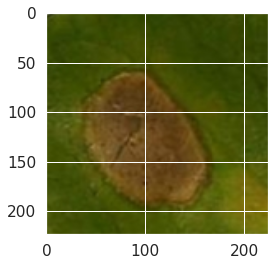

In [150]:
from skimage import io
img = train_image[700]
print(img.shape)
#img = cv2.imread(val_image[0])
io.imshow(img)
plt.show()

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)
le.fit(val_label)
val_label_encoded = le.transform(val_label)

In [ ]:
x_train,y_train,x_test,y_test = train_image,train_labe_encoded,val_image,val_label_encoded

In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = mobilenet_v2.MobileNetV2()
#model.summary()

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
out = model.get_layer(index = -2).output

In [ ]:
e_model = Model(inputs = model.input,outputs = out)

In [ ]:
del(model)

In [ ]:
print("Feature extraction ...")
prediction = np.array(e_model.predict(x_train))
prediction.shape

Feature extraction ...


(2523, 1280)

In [ ]:
Xtrain = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

In [ ]:
del(prediction)

In [ ]:
prediction = np.array(e_model.predict(x_test))

In [ ]:
Xtest = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

In [ ]:
del(prediction)

In [ ]:
print('\tFeatures training shape: ', Xtrain.shape)
print('\tFeatures testing shape: ', Xtest.shape)

	Features training shape:  (2523, 1280)
	Features testing shape:  (880, 1280)


In [ ]:
print("Classification with Linear SVM ...")
svm = SVC(kernel='linear')
h=svm.fit(Xtrain, np.ravel(y_train, order='C'))
result = svm.predict(Xtest)

acc = accuracy_score(result, np.ravel(y_test, order='C'))
print("\tAccuracy Linear SVM: %0.4f" % acc)

Classification with Linear SVM ...
	Accuracy Linear SVM: 0.9614


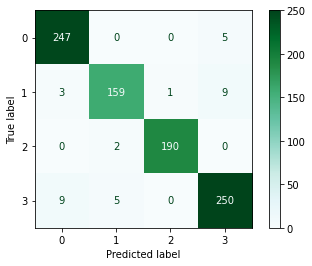

In [ ]:
cm = confusion_matrix(y_test, result, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
plt.show()

In [32]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       252
           1       0.96      0.92      0.94       172
           2       0.99      0.99      0.99       192
           3       0.95      0.95      0.95       264

    accuracy                           0.96       880
   macro avg       0.96      0.96      0.96       880
weighted avg       0.96      0.96      0.96       880



In [33]:
rf = RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(Xtrain, np.ravel(y_train, order='C'))

RandomForestClassifier(n_estimators=50, random_state=42)

In [34]:
result_rf = rf.predict(Xtest)

In [35]:
acc = accuracy_score(result_rf, np.ravel(y_test, order='C'))
print("\tAccuracy Linear SVM: %0.4f" % acc)
print(classification_report(y_test,result))

	Accuracy Linear SVM: 0.9159
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       252
           1       0.96      0.92      0.94       172
           2       0.99      0.99      0.99       192
           3       0.95      0.95      0.95       264

    accuracy                           0.96       880
   macro avg       0.96      0.96      0.96       880
weighted avg       0.96      0.96      0.96       880



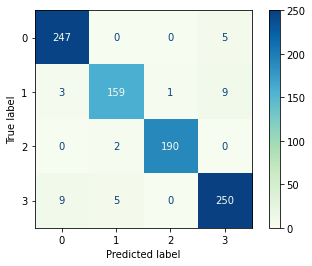

In [ ]:
cm = confusion_matrix(y_test, result, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot(cmap='GnBu')
plt.show()

Using KNN

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
E_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
E_clf.fit(Xtrain, y_train)
result_E = E_clf.predict(Xtest)
acc = accuracy_score(result_E, np.ravel(y_test, order='C'))
print("\tAccuracy Extra Tree: %0.4f" % acc)
print(classification_report(y_test,result_E))

	Accuracy Extra Tree: 0.9239
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       252
           1       0.97      0.86      0.91       172
           2       0.99      0.99      0.99       192
           3       0.91      0.89      0.90       264

    accuracy                           0.92       880
   macro avg       0.93      0.92      0.93       880
weighted avg       0.93      0.92      0.92       880



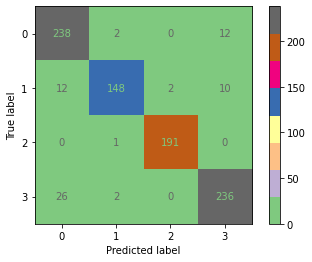

In [ ]:
cm = confusion_matrix(y_test, result_E, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=E_clf.classes_)
disp.plot(cmap='Accent')
plt.show()

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'healthy', 
                                        1: 'miner', 
                                        2: 'phoma',
                                        3: 'rust',})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

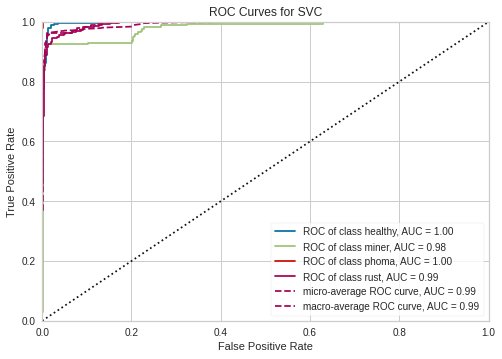

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fdbcd6d90>,
       encoder={0: 'healthy', 1: 'miner', 2: 'phoma', 3: 'rust'},
       estimator=SVC(kernel='linear'))

In [ ]:
plot_ROC_curve(svm,Xtrain,y_train,Xtest,y_test)

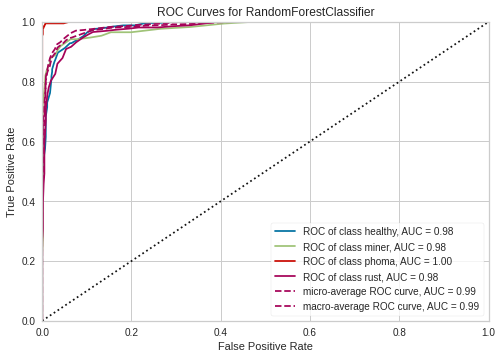

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fd96ace10>,
       encoder={0: 'healthy', 1: 'miner', 2: 'phoma', 3: 'rust'},
       estimator=RandomForestClassifier(n_estimators=50, random_state=42))

In [ ]:
plot_ROC_curve(rf,Xtrain,y_train,Xtest,y_test)

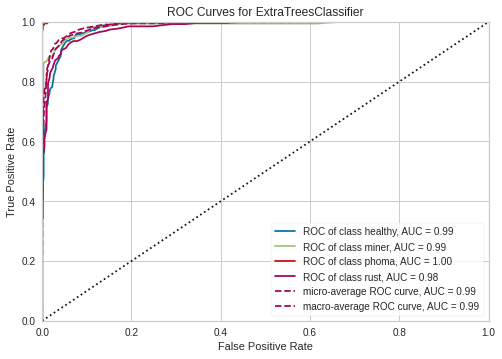

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f6b8d4910>,
       encoder={0: 'healthy', 1: 'miner', 2: 'phoma', 3: 'rust'},
       estimator=ExtraTreesClassifier(random_state=0))

In [ ]:
plot_ROC_curve(E_clf,Xtrain,y_train,Xtest,y_test)

In [197]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #io.imshow(image_hsv)
    #plt.show()
    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 50, 20])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [198]:
img = train_image[2100]

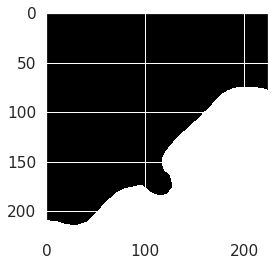

In [199]:
mask = create_mask_for_plant(img)
io.imshow(mask)
plt.show()

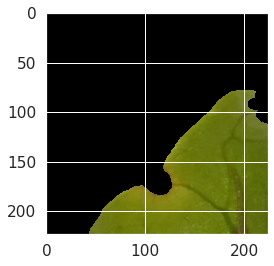

In [194]:
seg = segment_plant(img)
io.imshow(seg)
plt.show()

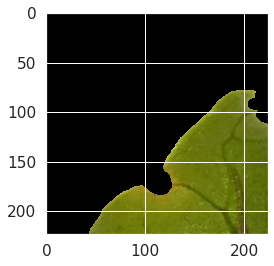

In [195]:
sharp = sharpen_image(seg)
io.imshow(sharp)
plt.show()

original image


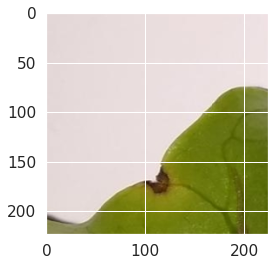

In [196]:
print("original image")
io.imshow(img)
plt.show()